## Exercício 3 (versao 1)
- Leia o arquivo abalone do exercicio 2
- faça o preprocessamento do atributo categorico e do atributo de saida como no exercicio 2
- estandardize todos os atributos numéricos. Voce pode estardartizar todo o arquivo de uma vez. Como discutimos em aula esse não é a coisa 100% certa, mas é um erro menor.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Constants
costs = 10 ** np.arange(-1., 4.)

# Pre-processing
def get_data():
    df = pd.read_csv('abalone.csv', header=None)
    
    # convert feature from numerical to categorical
    y = np.where(df.ix[:,8] > 13, 1,0)

    # drop target column
    x = df.drop(df.columns[[8]], axis=1)

    # one hot encode gender feature
    x = pd.get_dummies(x)    
    
    # standardization 
    scaler = preprocessing.StandardScaler()
    x = scaler.fit_transform(x)
    
    return x, y

# Total correct predictions divided by total number of samples
def accuracy(predicted, y):    
    return np.sum(predicted == y) / y.shape[0]

X, y = get_data()

## Logistic Regression

- faça o logistic regression com $C=10^{-1,0,1,2,3}$. O loop externo deve ser um 5-fold CV estratificado. 
- O loop interno para a escolha do hiperparametro deve ser um 3-fold estratificado.
- voce tem que fazer o loop interno explicitamente, usando StratifiedKFold e não funções como GridSearchCV
- qual a acurácia do LR com a melhore escolha de parametros (para cada fold)?

In [19]:
def grid_search(X, y):
    kfold = StratifiedKFold(n_splits=3, random_state=1)    
    accuracies = [0, 0, 0, 0, 0]
    
    # 3 fold to find the best C
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        for i in range(len(costs)):
            logistic = linear_model.LogisticRegression(random_state=1, C=costs[i])
            logistic.fit(X_train, y_train)
            acc = logistic.score(X_test, y_test)
            accuracies[i] += acc
    
    # find highest accuracy and return the C for that accuracy
    highest_acc = max(accuracies)
    highest_acc_index = accuracies.index(highest_acc)
    return costs[highest_acc_index]
    
X, y = get_data()
outter = StratifiedKFold(n_splits=5, random_state=1)
accs = []

# outer loop
# 5 fold to calculate accuracy for this model
for train_index, test_index in outter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # inner loop
    # pick the best cost hyper parameter
    c = grid_search(X_train, y_train)
    
    logistic = linear_model.LogisticRegression(random_state=1, C=c)
    logistic.fit(X_train, y_train)    
    acc = logistic.score(X_test, y_test)
    accs.append(acc)
    print('best C is', c, 'with accuracy', acc)

lr_acc = np.mean(accs)
print('mean accuracy is', lr_acc)

best C is 1.0 with accuracy 0.895933014354
best C is 1000.0 with accuracy 0.894736842105
best C is 100.0 with accuracy 0.899401197605
best C is 1000.0 with accuracy 0.900598802395
best C is 100.0 with accuracy 0.895808383234
mean accuracy is 0.897295647939


## Linear SVM
- faça o LinearSVM com $C=10^{-1,0,1,2,3}$. O loop externo deve ser um 5-fold estratificado. 
- O loop interno um 3-fold estratificado. Neste caso voce nao precisa fazer o 3 fold explicitamente, 
- voce pode usar o GridSearchCV.
- qual a acurácia do LinearSVM com a melhor escolha de C?

In [20]:
X, y = get_data()
outter = StratifiedKFold(n_splits=5, random_state=1)
accs = []

# 5 fold to calculate accuracy for this model
for train_index, test_index in outter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    parameters = {'C':costs}
    svr = svm.LinearSVC()
    clf = GridSearchCV(svr, parameters, cv=3)
    model = clf.fit(X_train, y_train)
    
    svr = svm.LinearSVC(C=clf.best_params_['C'])
    svr.fit(X_train, y_train)
    acc = svr.score(X_test, y_test)
    accs.append(acc)
    print('best C is', clf.best_params_['C'], 'with accuracy', acc)

svm_acc = np.mean(accs)
print('mean accuracy of svm is', svm_acc)

best C is 10.0 with accuracy 0.8995215311
best C is 10.0 with accuracy 0.897129186603
best C is 0.1 with accuracy 0.901796407186
best C is 1.0 with accuracy 0.899401197605
best C is 0.1 with accuracy 0.893413173653
mean accuracy of svm is 0.898252299229


## LDA
Faça o LDA. Reporte a acuracia

In [21]:
X, y = get_data()
outter = StratifiedKFold(n_splits=5, random_state=1)
accs = []
for train_index, test_index in outter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)    
    acc = clf.score(X_test, y_test)
    accs.append(acc)
    print('accuracy', acc)

lda_acc = np.mean(acc)
print('mean accuracy =', lda_acc)


accuracy 0.893540669856
accuracy 0.898325358852
accuracy 0.898203592814
accuracy 0.897005988024
accuracy 0.891017964072
mean accuracy = 0.891017964072


/Users/tanakaed/anaconda3/envs/condaenv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Classificador Final
- qual o melhor classificador para esse problema?
- se não o LDA, calcule o hiperparametro C a ser usado
- gere o classificador final.

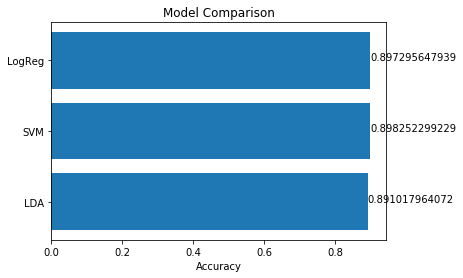

In [22]:
fig, ax = plt.subplots()

# Example data
algos = ('LogReg', 'SVM','LDA')
y_pos = np.arange(len(algos))
accs = [lr_acc, svm_acc, lda_acc]

ax.barh(y_pos, accs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Model Comparison')
for i, v in enumerate(accs):
    ax.text(v, i, str(v))

plt.show()

In [23]:
X, y = get_data()

# pick the best cost hyper parameter
parameters = {'C':costs}

model_accs = [lr_acc, svm_acc, lda_acc]
highest_acc = max(model_accs)
highest_acc_index = model_accs.index(highest_acc)
final_model = None

if highest_acc_index == 2:
    print('best model is LDA')
    clf = LinearDiscriminantAnalysis()
    final_model = clf.fit(X, y)
elif highest_acc_index == 1:
    clf = GridSearchCV(svm.LinearSVC(), parameters, cv=3)
    model = clf.fit(X, y)
    c = clf.best_params_['C']
    print('best model is SVM with C is', c)
    final_model = svm.LinearSVC(C=c)   
else:
    clf = GridSearchCV(linear_model.LogisticRegression(random_state=1), parameters, cv=3)
    model = clf.fit(X, y)
    c = clf.best_params_['C']
    print('best model is Logistic Regression with C is', c)
    final_model = linear_model.LogisticRegression(random_state=1, C=c)
    
# this is the final model to be delivered and go to production
final_model

best model is SVM with C is 1.0


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)